# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Aa Afriz Muhammad Gymnastiar Assegaf]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- apakah dampak cuaca terhadap jumlah penyewaan?
- bagaimana pola penyewaan sepeda berubah sepanjang musim yang berbeda, dan apakah ada musim tertentu yang menunjukan peningkatan atau penurunan yang signifikan dalam jumlah penyewaan?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#hour_df = pd.read_csv('/content/drive/My Drive/submissions/data/hour.csv')
#print(hour_df.head())

In [8]:
file_path = '/home/aionn-99/project/dicoding/submissions/data/hour.csv'
hour_df = pd.read_csv(file_path)
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [9]:
#day_df = pd.read_csv('/content/drive/My Drive/submissions/data/day.csv')
#print(day_df.head())

In [10]:
file_path = '/home/aionn-99/project/dicoding/submissions/data/day.csv'
day_df = pd.read_csv(file_path)
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- kedua tabel memiliki variabel yang sama, kecuali tabel hour yang memiliki tambahan variabel **hr**
- tabel hour memiliki tambahan variabel **hr** yang cocok untuk analisis harian, seperti analisis penyewaan pada jam-jam tertentu di hari itu.

### Assessing Data

In [11]:
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tipe data dteday pada tabel hour dan tabel day tidak sesuai, yang saat ini bertipe **object** dan sebaiknya diubah menjadi **datetime**.
- tidak ada missing value dalam ke 2 tabel diatas
- tidak ada duplikasi dalam ke 2 tabel diatas
- tidak ada inaccurate values dalam ke 2 tabel diatas

### Cleaning Data

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- type data untuk variabel **dteday** untuk kedua kolom sudah disesuaikan dari **object** menjadi **datetime**
- data pada tabel sudah bersih dari data type yang tidak sesuai, inaccurate values, duplikasi, dan missing values

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
weather_group = day_df.groupby('weathersit')['cnt'].mean().reset_index()
print("Rata-rata penyewaan per cuaca:\n", weather_group)


correlation = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print("\nKorelasi:\n", correlation)

Rata-rata penyewaan per cuaca:
    weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714

Korelasi:
                temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


In [18]:
season_group = day_df.groupby('season')['cnt'].mean().reset_index()
print("Rata-rata penyewaan per musim:\n", season_group)


day_df['month'] = day_df['dteday'].dt.month
monthly_trend = day_df.groupby('month')['cnt'].mean().reset_index()
print("\nTren bulanan:\n", monthly_trend)

Rata-rata penyewaan per musim:
    season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921

Tren bulanan:
     month          cnt
0       1  2176.338710
1       2  2655.298246
2       3  3692.258065
3       4  4484.900000
4       5  5349.774194
5       6  5772.366667
6       7  5563.677419
7       8  5664.419355
8       9  5766.516667
9      10  5199.225806
10     11  4247.183333
11     12  3403.806452


**Insight:**
- hasil dari pivot tabel menunjukan korelasi positif antara **jumlah penyewaan** dengan **suhu**
- jumlah rata-rata penyewaan pada saat cuaca cerah (1) memiliki total paling tinggi diikuti dengan cuaca berawan (2), dan kemudian cuaca hujan (3)
- rata-rata sewa di musim gugur (3) memiliki jumlah paling tinggi, diikuti oleh musim panas (2), musim dingin (4), dan musim semi (1)
- ada penurunan jumlah rata-rata sewa yang signifikan pada musim semi, dari musim sebelumnya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipykernel_11548/651107116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_group, palette="Blues_d")


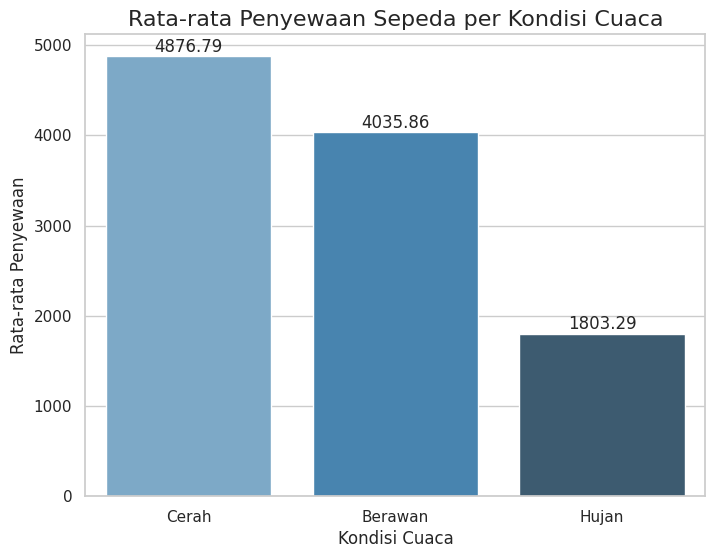

In [19]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group, palette="Blues_d")


plt.title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)


plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Berawan', 'Hujan'])

for i, row in weather_group.iterrows():
    plt.text(i, row['cnt'] + 50, round(row['cnt'], 2), ha='center')


plt.show()

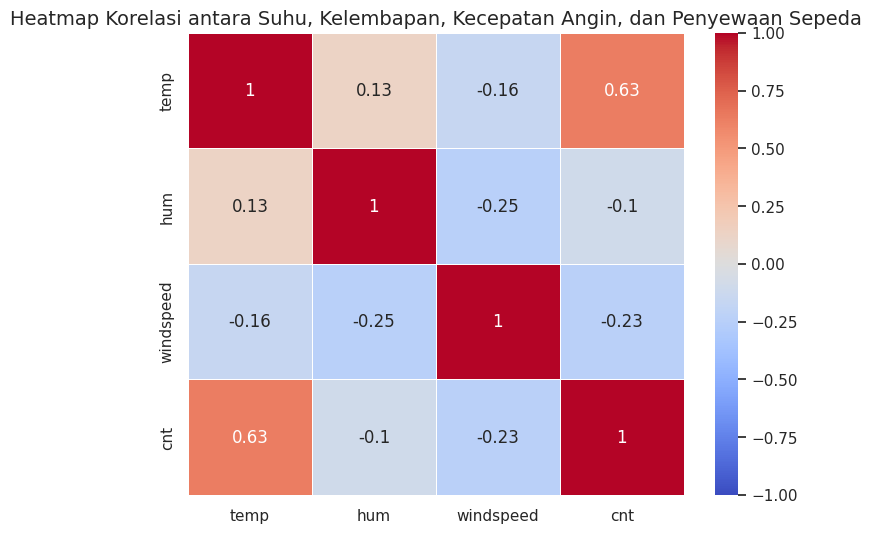

In [20]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

plt.title('Heatmap Korelasi antara Suhu, Kelembapan, Kecepatan Angin, dan Penyewaan Sepeda', fontsize=14)

plt.show()

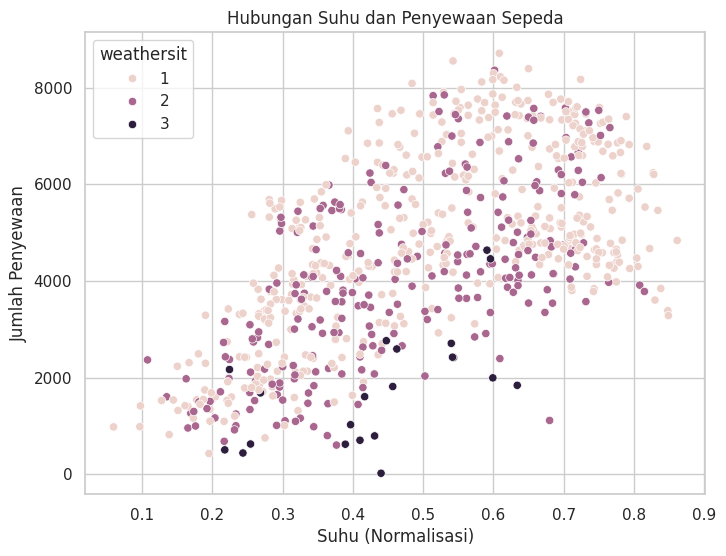

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', hue='weathersit', data=day_df)
plt.title('Hubungan Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

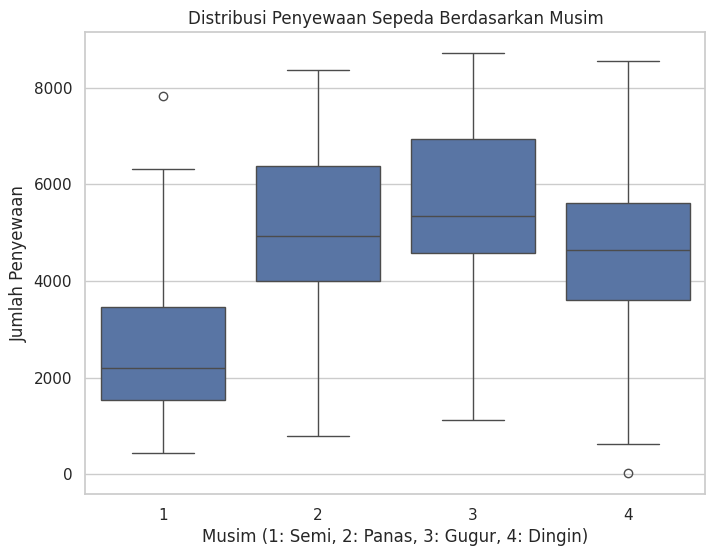

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

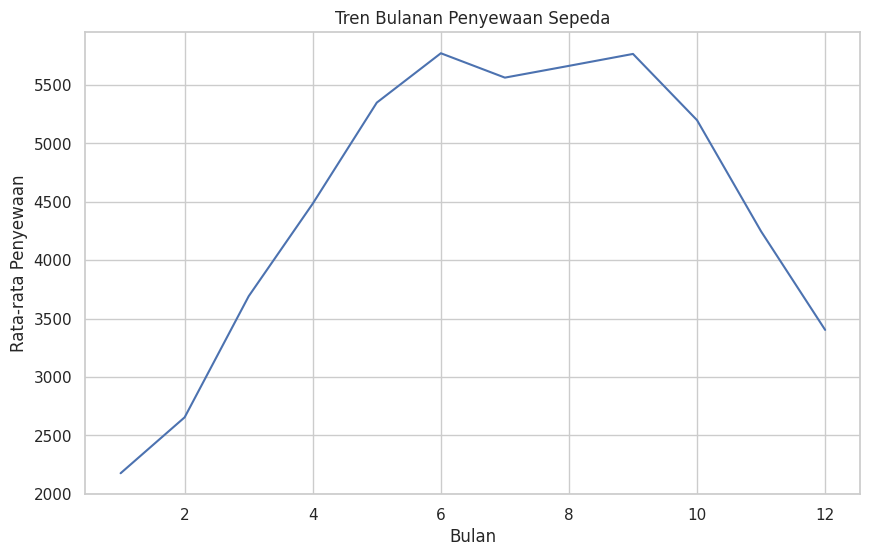

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='cnt', data=monthly_trend)
plt.title('Tren Bulanan Penyewaan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Data menunjukkan rata-rata penyewaan tertinggi pada hari cerah (4876,786), diikuti hari berawan (4035,862), dan terendah pada hari hujan (1803,286). Pola ini konsisten dengan ekspektasi bahwa pengguna lebih memilih bersepeda saat cuaca baik. Hari hujan mungkin mengurangi penyewaan karena ketidaknyamanan, risiko keselamatan, dan potensi kerusakan pada sepeda.
- Matriks korelasi menunjukkan hubungan positif kuat antara suhu (temp) dan penyewaan (0,627), yang menunjukkan bahwa suhu tinggi mendorong lebih banyak penyewaan. Ini kemungkinan karena suhu yang nyaman mendorong aktivitas seperti olahraga atau rekreasi. Sebaliknya, kelembapan (hum) memiliki korelasi negatif (-0,101), menunjukkan bahwa kelembapan tinggi membuat bersepeda tidak nyaman karena keringat dan kelembapan udara. Kecepatan angin (windspeed) juga memiliki korelasi negatif (-0,234), yang menunjukkan bahwa angin kencang dapat membuat bersepeda lebih sulit dan kurang aman.
- Tren bulanan menunjukkan puncak penyewaan di September (5766,517) dan Juni (5772,367), dengan penurunan di Juli (5563,677) dan Agustus (5664,419), kemungkinan karena suhu tinggi dan kelembapan di musim panas. Penyewaan menurun signifikan di Desember (3403,806), sesuai dengan cuaca dingin musim dingin. Ada penurunan signifikan dari musim dingin ke musim semi, dengan rata-rata musim dingin 4728,163 dan musim semi 2604,133. Pola ini tidak biasa, karena biasanya musim semi diharapkan memiliki peningkatan penyewaan seiring suhu naik. Namun, data menunjukkan sebaliknya, yang mungkin disebabkan oleh cuaca tidak menentu, curah hujan lebih tinggi, atau faktor eksternal lainnya

## Analisis Lanjutan (Opsional)

## Conclusion

- Cuaca secara langsung memengaruhi penyewaan sepeda, dengan hari cerah dan suhu hangat meningkatkan jumlah penyewaan, sementara hujan, kelembapan tinggi, dan angin kencang menurunkannya.
- Penyewaan sepeda mencapai puncaknya di musim gugur, diikuti musim panas dan musim dingin, dengan penurunan signifikan dan tak terduga di musim semi, yang mungkin dipengaruhi oleh kondisi cuaca yang kurang mendukung.

In [24]:
all_df.to_csv("all_data.csv", index=False)

NameError: name 'all_df' is not defined